In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook

In [2]:
# Four-bar function

def four_bar(a, b, c, d, alpha, delta, alpha_dot, alpha_double_dot, index):
    k1 = (d**2 + a**2 - b**2 + c**2) / (2 * a * c)
    k2 = d / a
    k3 = d / c

    A = k2 - np.cos(alpha - delta)
    B = -np.sin(alpha - delta)
    C = k1 - k3 * np.cos(alpha - delta)

    dist = C / np.sqrt(A**2 + B**2)

    u = -A * C / (A**2 + B**2)
    v = -B * C / (A**2 + B**2)

    gamma = np.zeros((2, len(alpha)))

    gamma[0, :] = np.arctan(v / u) - np.arccos(dist) + delta + np.pi * (A > 0)
    gamma[1, :] = np.arctan(v / u) + np.arccos(dist) + delta + np.pi * (A > 0)
    
    true_gamma = gamma[index, :]

    true_beta = np.arctan((d * np.sin(delta) + c * np.sin(true_gamma) - a * np.sin(alpha)) / (d * np.cos(delta) + c * np.cos(true_gamma) - a * np.cos(alpha))) + np.pi * ((d * np.cos(delta) + c * np.cos(true_gamma) - a * np.cos(alpha)) < 0)

    true_gamma_dot = a * alpha_dot * np.sin(alpha - true_beta) / (c * np.sin(true_gamma - true_beta))
    
    true_beta_dot = a * alpha_dot * np.sin(alpha - true_gamma) / (b * np.sin(true_gamma - true_beta))

    true_gamma_double_dot = (a * alpha_double_dot * np.sin(alpha - true_beta) + a * alpha_dot**2 * np.cos(alpha - true_beta) + b * true_beta_dot**2 - c * true_gamma_dot**2 * np.cos(true_gamma - true_beta)) / (c * np.sin(true_gamma - true_beta))
    
    true_beta_double_dot = (a * alpha_double_dot * np.sin(alpha - true_gamma) + a * alpha_dot**2 * np.cos(alpha - true_gamma) + b * true_beta_dot**2 * np.cos(true_beta - true_gamma) - c * true_gamma_dot**2) / (b * np.sin(true_gamma - true_beta))

    return true_beta, true_gamma, true_beta_dot, true_gamma_dot, true_beta_double_dot, true_gamma_double_dot

In [3]:
# Fish 2 quantities

conv = 180 / np.pi

a0_ref2 = -3000
a1_ref2 = 330j
a2_ref2 = 1000 - 390j

o_muscle_ref2 = -3000 - 330j

a_ref2 = 420 - 580j
b_ref2 = -50 - 150j
c_ref2 = 470 - 180j
d_ref2 = -100 - 550j

m_ref2 = 580 + 520j
r_ref2 = 580 + 520j

r2 = np.abs(r_ref2)
correction2 = 1 / r2
r2 = r2 * correction2

a02 = np.abs(a0_ref2) * correction2
a12 = np.abs(a1_ref2) * correction2
a22 = np.abs(a2_ref2) * correction2

o_muscle_in2 = np.abs(o_muscle_ref2) * correction2

a2 = np.abs(a_ref2) * correction2
b2 = np.abs(b_ref2) * correction2
c2 = np.abs(c_ref2) * correction2
d2 = np.abs(d_ref2) * correction2
d_ang2 = np.angle(d_ref2)

m2 = np.abs(m_ref2) * correction2

In [4]:
# solve kinematics

o_contr2 = np.arange(0, 0.025, 0.0005)
delta_o_muscle2 = o_muscle_in2 * o_contr2
o_muscle2 = np.empty_like(o_contr2)
o_muscle2[:len(o_contr2)] = o_muscle_in2 - delta_o_muscle2

a0_ang2 = np.angle(a0_ref2)
a1_ang2 = a0_ang2 - np.arccos((a02**2 + a12**2 - o_muscle2**2) / (2 * a02 * a12))
o_muscle_ang2 = np.arccos((a02 * np.cos(a0_ang2) - a12 * np.cos(a1_ang2)) / o_muscle2) * np.sign((a02 * np.sin(a0_ang2) - a12 * np.sin(a1_ang2)) / o_muscle2)
a2_ang2 = a1_ang2 + np.angle(a2_ref2) - np.angle(a1_ref2)
a_ang2 = a1_ang2 + np.angle(a_ref2) - np.angle(a1_ref2)

o_muscle_dot2 = np.full_like(o_muscle2, -1)
o_muscle_ang_dot2 = o_muscle_dot2 * np.cos(o_muscle_ang2 - a1_ang2) / (o_muscle2 * np.sin(o_muscle_ang2 - a1_ang2))
a1_ang_dot2 = o_muscle_dot2 / (a12 * np.sin(a1_ang2 - o_muscle_ang2))
a_ang_dot2 = a1_ang_dot2

o_muscle_double_dot2 = np.zeros_like(o_muscle2)
a1_ang_double_dot2 = (a12 * o_muscle_double_dot2 * np.sin(a1_ang2 - o_muscle_ang2) - o_muscle_dot2 * np.cos(a1_ang2 - o_muscle_ang2) * (a1_ang_dot2 - o_muscle_ang_dot2)) / ((a12 * np.sin(a1_ang2 - o_muscle_ang2))**2)
a_ang_double_dot2 = a1_ang_double_dot2

b_ang2, c_ang2, b_ang_dot2, c_ang_dot2, b_ang_double_dot2, c_ang_double_dot2 = four_bar(a2, b2, c2, d2, a_ang2, d_ang2, a_ang_dot2, a_ang_double_dot2, 0)

m_ang2 = b_ang2 + np.angle(m_ref2) - np.angle(b_ref2)
m_ang_dot2 = b_ang_dot2
r_ang2 = a_ang2 + np.angle(r_ref2) - np.angle(a_ref2)

opening_ang2 = r_ang2 - m_ang2 + 2 * np.pi
opening_vel2 = a_ang_dot2 - b_ang_dot2
opening_vel_norm2 = -opening_vel2 / o_muscle_dot2

dist_2 = r2 * np.exp(1j * r_ang2) - m2 * np.exp(1j * m_ang2)
dist2 = np.abs(dist_2)

delta_o_muscle_norm2 = delta_o_muscle2 / r2

c_muscle2 = np.abs(a2 * np.exp(1j * a_ang2) + 1/4 * m2 * np.exp(1j * m_ang2) - 1/2 * d2 * np.exp(1j * d_ang2))
c_muscle_ang2 = np.angle(a2 * np.exp(1j * a_ang2) + 1/4 * m2 * np.exp(1j * m_ang2) - 1/2 * d2 * np.exp(1j * d_ang2))

In [5]:
# Fish 2 Rolling point
OP2 = np.vstack((np.real(a2 * np.exp(1j * a_ang2)), np.imag(a2 * np.exp(1j * a_ang2)), np.zeros(len(o_contr2)))).T

vel_P2 = np.cross(np.hstack((np.zeros((len(o_contr2), 1)), np.zeros((len(o_contr2), 1)), a_ang_dot2.reshape(-1, 1))), np.hstack((np.real( a2 * np.exp(1j * a_ang2)).reshape(-1, 1), np.imag(a2 * np.exp(1j * a_ang2)).reshape(-1, 1), np.zeros((len(o_contr2), 1)))))

omega_P2 = np.hstack((np.zeros((len(o_contr2), 1)), np.zeros((len(o_contr2), 1)), b_ang_dot2.reshape(-1, 1)))

OC2 = (np.cross(omega_P2, vel_P2) / b_ang_dot2.reshape(-1, 1) ** 2) + OP2

<IPython.core.display.Javascript object>


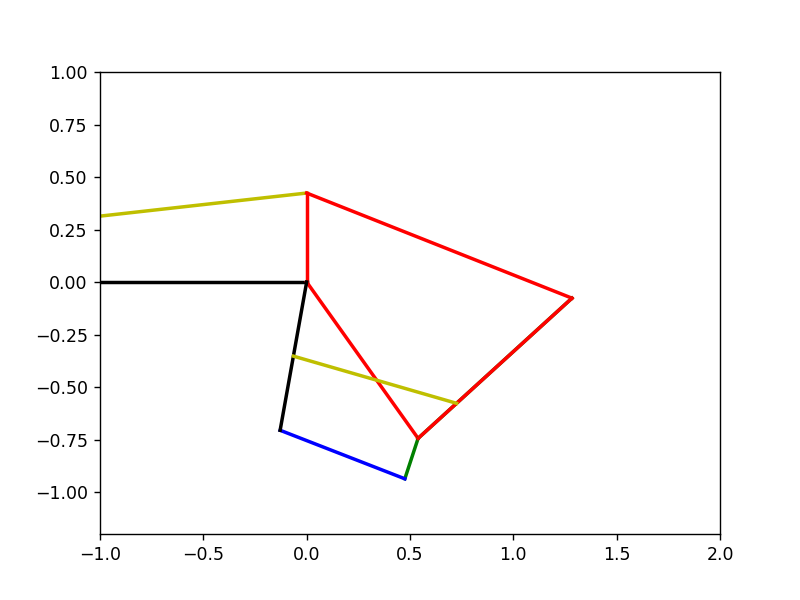

In [6]:
# Fish 2 Position 0 plot

o_muscle2x = np.real(o_muscle2[0] * np.exp(1j * o_muscle_ang2[0]))
o_muscle2y = np.imag(o_muscle2[0] * np.exp(1j * o_muscle_ang2[0]))
a02x = np.real(a02 * np.exp(1j * a0_ang2))
a02y = np.imag(a12 * np.exp(1j * a0_ang2))
a12x = np.real(a12 * np.exp(1j * a1_ang2[0]))
a12y = np.imag(a12 * np.exp(1j * a1_ang2[0]))
a22x = np.real(a22 * np.exp(1j * a2_ang2[0]))
a22y = np.imag(a22 * np.exp(1j * a2_ang2[0]))
    
a2x = np.real(a2 * np.exp(1j * a_ang2[0]))
a2y = np.imag(a2 * np.exp(1j * a_ang2[0]))
b2x = np.real(b2 * np.exp(1j * b_ang2[0]))
b2y = np.imag(b2 * np.exp(1j * b_ang2[0]))
c2x = np.real(c2 * np.exp(1j * c_ang2[0]))
c2y = np.imag(c2 * np.exp(1j * c_ang2[0]))
d2x = np.real(d2 * np.exp(1j * d_ang2))
d2y = np.imag(d2 * np.exp(1j * d_ang2))
    
m2x = np.real(m2 * np.exp(1j * m_ang2[0]))
m2y = np.imag(m2 * np.exp(1j * m_ang2[0]))
r2x = np.real(r2 * np.exp(1j * r_ang2[0]))
r2y = np.imag(r2 * np.exp(1j * r_ang2[0]))

c_muscle2x = np.real(c_muscle2[0] * np.exp(1j * c_muscle_ang2[0]))
c_muscle2y = np.imag(c_muscle2[0] * np.exp(1j * c_muscle_ang2[0]))

plt.plot([a12x, a12x + o_muscle2x], [a12y, a12y + o_muscle2y], 'y', linewidth=2)
plt.plot([0, a02x], [0, a02y], 'k', linewidth=2)
plt.plot([0, a12x], [0, a12y], 'r', linewidth=2)
plt.plot([a12x, a12x + a22x], [a12y, a12y + a22y], 'r', linewidth=2)

plt.plot([0, a2x], [0, a2y], 'r', linewidth=2)
plt.plot([a2x, a2x + b2x], [a2y, a2y + b2y], 'g', linewidth=2)
plt.plot([d2x, d2x + c2x], [d2y, d2y + c2y], 'b', linewidth=2)
plt.plot([0, d2x], [0, d2y], 'k', linewidth=2)
    
plt.plot([a2x, a2x + m2x], [a2y, a2y + m2y], 'g', linewidth=2)
plt.plot([a2x, a2x + r2x], [a2y, a2y + r2y], 'r', linewidth=2)
    
plt.plot([1/2 * d2x, 1/2 * d2x + c_muscle2x], [1/2 * d2y, 1/2 * d2y + c_muscle2y], 'y', linewidth=2)
   
plt.xlim([-1, 2])
plt.ylim([-1.2, 1])
    
    
plt.show()

<IPython.core.display.Javascript object>


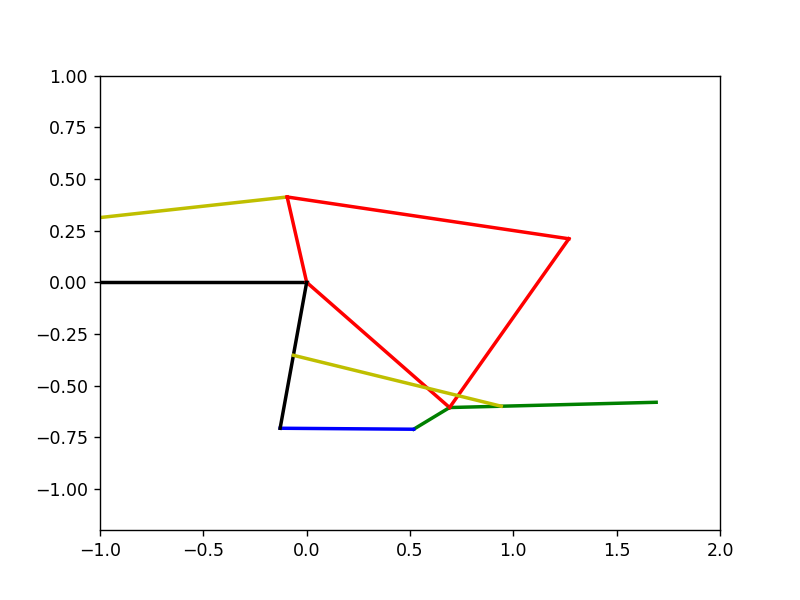

In [7]:
# Fish 2 Opening animation

fig, ax = plt.subplots()

def update(i):
    ax.clear()  # Clear the previous frame
    # Plot your data here
    o_muscle2x = np.real(o_muscle2[i] * np.exp(1j * o_muscle_ang2[i]))
    o_muscle2y = np.imag(o_muscle2[i] * np.exp(1j * o_muscle_ang2[i]))
    a02x = np.real(a02 * np.exp(1j * a0_ang2))
    a02y = np.imag(a12 * np.exp(1j * a0_ang2))
    a12x = np.real(a12 * np.exp(1j * a1_ang2[i]))
    a12y = np.imag(a12 * np.exp(1j * a1_ang2[i]))
    a22x = np.real(a22 * np.exp(1j * a2_ang2[i]))
    a22y = np.imag(a22 * np.exp(1j * a2_ang2[i]))
    
    a2x = np.real(a2 * np.exp(1j * a_ang2[i]))
    a2y = np.imag(a2 * np.exp(1j * a_ang2[i]))
    b2x = np.real(b2 * np.exp(1j * b_ang2[i]))
    b2y = np.imag(b2 * np.exp(1j * b_ang2[i]))
    c2x = np.real(c2 * np.exp(1j * c_ang2[i]))
    c2y = np.imag(c2 * np.exp(1j * c_ang2[i]))
    d2x = np.real(d2 * np.exp(1j * d_ang2))
    d2y = np.imag(d2 * np.exp(1j * d_ang2))
    
    m2x = np.real(m2 * np.exp(1j * m_ang2[i]))
    m2y = np.imag(m2 * np.exp(1j * m_ang2[i]))
    r2x = np.real(r2 * np.exp(1j * r_ang2[i]))
    r2y = np.imag(r2 * np.exp(1j * r_ang2[i]))

    c_muscle2x = np.real(c_muscle2[i] * np.exp(1j * c_muscle_ang2[i]))
    c_muscle2y = np.imag(c_muscle2[i] * np.exp(1j * c_muscle_ang2[i]))

    plt.plot([a12x, a12x + o_muscle2x], [a12y, a12y + o_muscle2y], 'y', linewidth=2)
    plt.plot([0, a02x], [0, a02y], 'k', linewidth=2)
    plt.plot([0, a12x], [0, a12y], 'r', linewidth=2)
    plt.plot([a12x, a12x + a22x], [a12y, a12y + a22y], 'r', linewidth=2)

    plt.plot([0, a2x], [0, a2y], 'r', linewidth=2)
    plt.plot([a2x, a2x + b2x], [a2y, a2y + b2y], 'g', linewidth=2)
    plt.plot([d2x, d2x + c2x], [d2y, d2y + c2y], 'b', linewidth=2)
    plt.plot([0, d2x], [0, d2y], 'k', linewidth=2)
    
    plt.plot([a2x, a2x + m2x], [a2y, a2y + m2y], 'g', linewidth=2)
    plt.plot([a2x, a2x + r2x], [a2y, a2y + r2y], 'r', linewidth=2)
    
    plt.plot([1/2 * d2x, 1/2 * d2x + c_muscle2x], [1/2 * d2y, 1/2 * d2y + c_muscle2y], 'y', linewidth=2)
   
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim([-1, 2])
    plt.ylim([-1.2, 1])

# Create the animation
ani = FuncAnimation(fig, update, frames=len(a_ang2), repeat=False)

# Display the animation
plt.show()
    

<IPython.core.display.Javascript object>


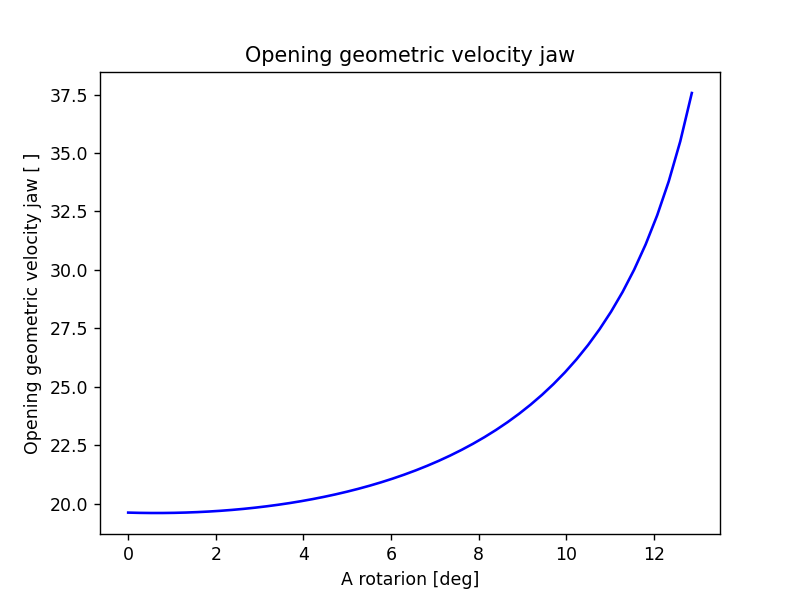

<IPython.core.display.Javascript object>


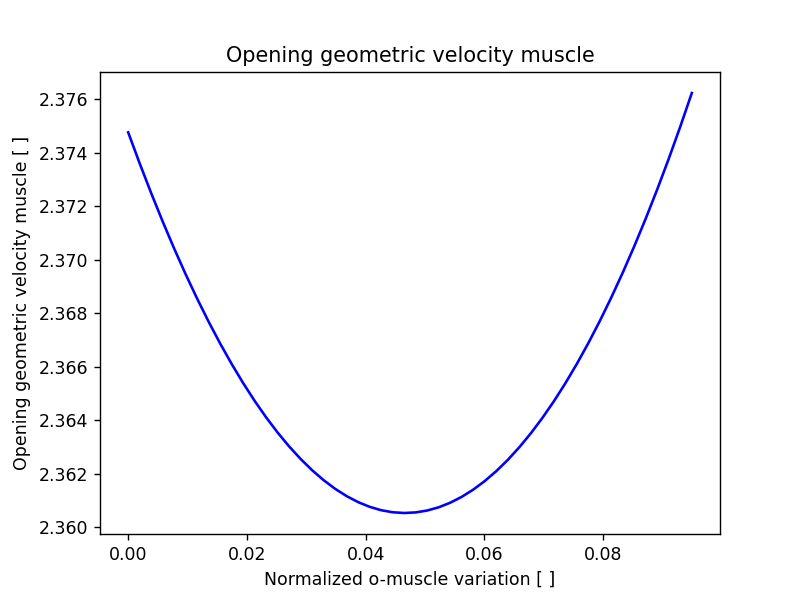

In [8]:
# Fish 2 mechanical parameters

# Jaw linkage
o_geom_vel_jaw2 = opening_vel2 * a_ang_dot2

plt.figure()
plt.plot((a_ang2-a_ang2[0])*conv, o_geom_vel_jaw2,'b')
plt.title('Opening geometric velocity jaw')
plt.xlabel('A rotarion [deg]')
plt.ylabel('Opening geometric velocity jaw [ ]')

# Muscle linkage
k_m2 = (a_ang2-a_ang2[0])*conv

o_geom_vel_muscle2 = -(a_ang_dot2/o_muscle_dot2)

plt.figure()
plt.plot(delta_o_muscle_norm2, o_geom_vel_muscle2, 'b')
plt.title('Opening geometric velocity muscle')
plt.xlabel('Normalized o-muscle variation [ ]')
plt.ylabel('Opening geometric velocity muscle [ ]')

plt.show()

<IPython.core.display.Javascript object>


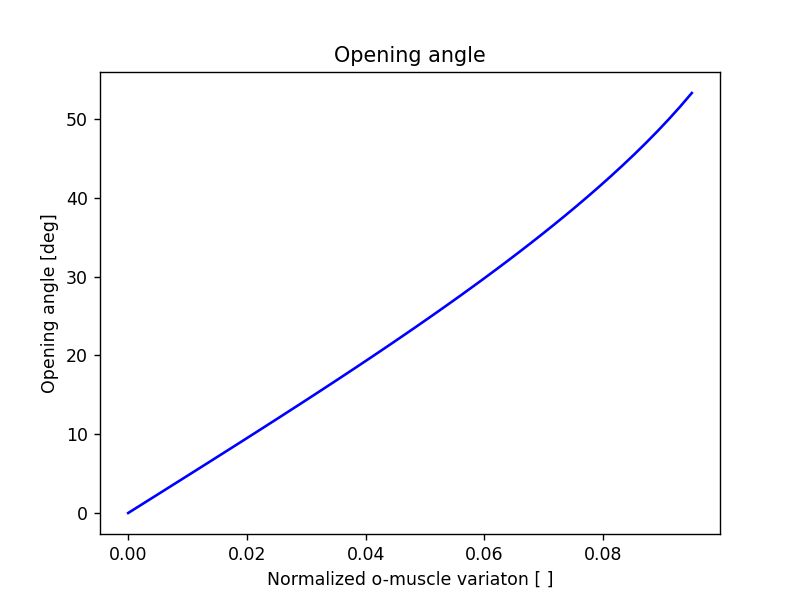

<IPython.core.display.Javascript object>


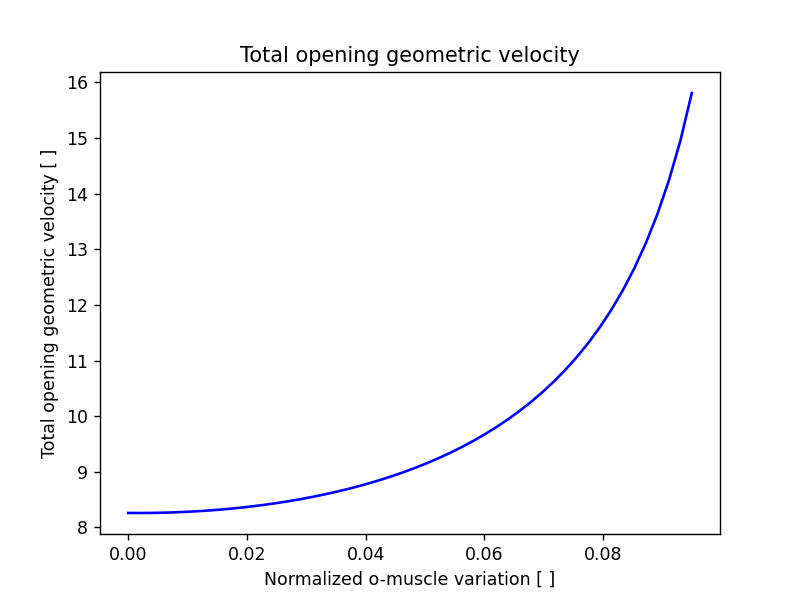

<IPython.core.display.Javascript object>


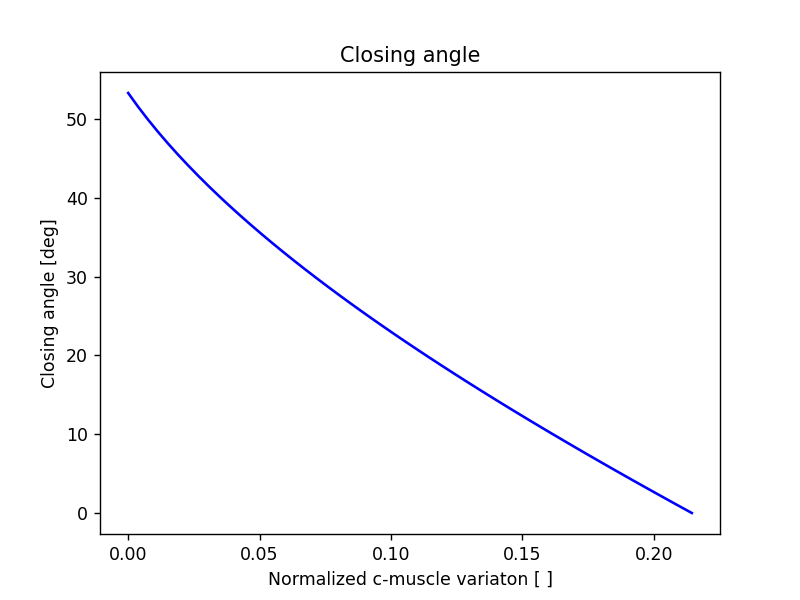

<IPython.core.display.Javascript object>


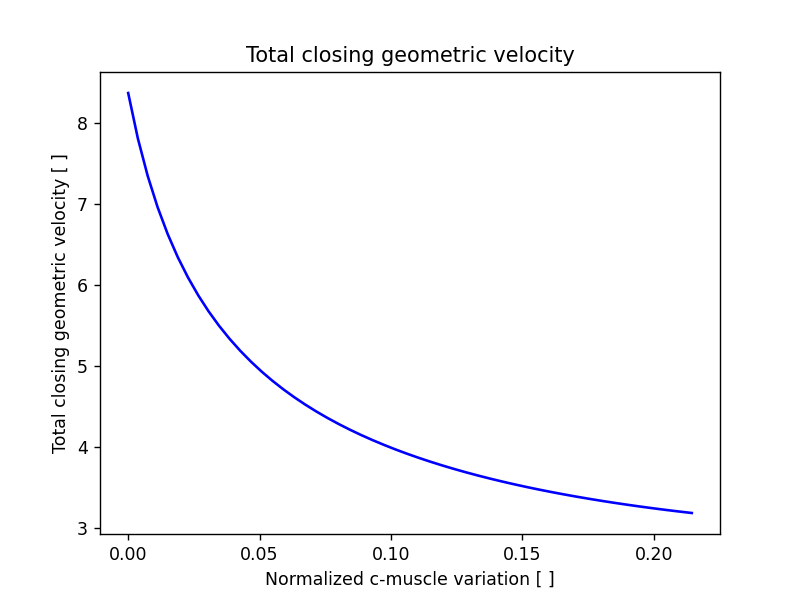

In [9]:
# Opening plot

plt.figure()
plt.plot(delta_o_muscle_norm2,(opening_ang2)*conv, 'b')
plt.title('Opening angle')
plt.xlabel('Normalized o-muscle variaton [ ]')
plt.ylabel('Opening angle [deg]')

plt.figure()
plt.plot(delta_o_muscle_norm2,opening_vel_norm2,'b')
plt.title('Total opening geometric velocity')
plt.xlabel('Normalized o-muscle variation [ ]')
plt.ylabel('Total opening geometric velocity [ ]')

# Closing plot

delta_c_muscle2 = (c_muscle2[-1]-c_muscle2)
delta_c_muscle_norm2 = delta_c_muscle2
c_contr2 = delta_c_muscle2/c_muscle2[-1]

c_muscle_dot2 = (a2*a_ang_dot2*np.cos(a_ang2)+1/4*m2*m_ang_dot2*np.cos(m_ang2))*np.sin(c_muscle_ang2)-(a2*a_ang_dot2*np.sin(a_ang2)+1/4*m2*m_ang_dot2*np.sin(m_ang2))*np.cos(c_muscle_ang2)
c_muscle_ang_dot2 = (c_muscle_dot2*np.cos(c_muscle_ang2)+a2*a_ang_dot2*np.sin(a_ang2)+1/4*m2*m_ang_dot2*np.sin(m_ang2))/(c_muscle2*np.sin(c_muscle_ang2))

plt.figure()
plt.plot(delta_c_muscle_norm2,(opening_ang2)*conv,'b')
plt.title('Closing angle')
plt.xlabel('Normalized c-muscle variaton [ ]')
plt.ylabel('Closing angle [deg]')

closing_vel_norm2 = (opening_vel2/c_muscle_dot2)

plt.figure()
plt.plot(delta_c_muscle_norm2,closing_vel_norm2,'b')
plt.title('Total closing geometric velocity')
plt.xlabel('Normalized c-muscle variation [ ]')
plt.ylabel('Total closing geometric velocity [ ]')

plt.show()

delta_c_muscle_neg2 = (c_muscle2[0]-c_muscle2)
delta_c_muscle_neg_norm2 = delta_c_muscle_neg2
c_contr_neg2 = delta_c_muscle_neg2/c_muscle2[-1]

<IPython.core.display.Javascript object>


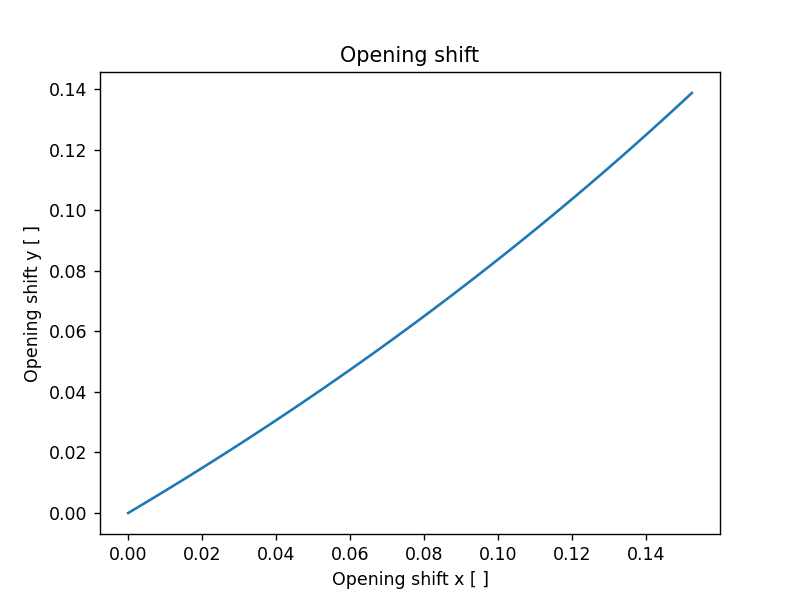

<IPython.core.display.Javascript object>


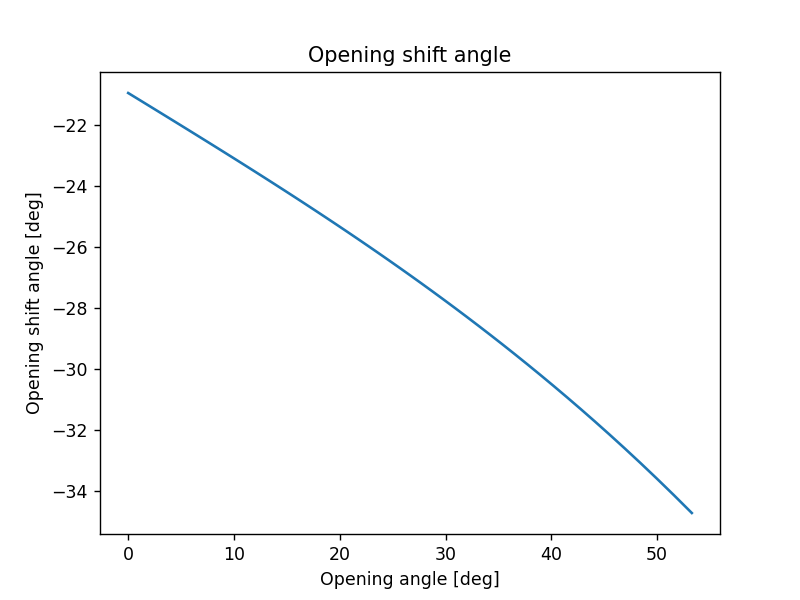

In [10]:
# Translation

trasl2x = np.real(a2*np.exp(1j*a_ang2))-np.real(a2*np.exp(1j*a_ang2[0]))
trasl2y = np.imag(a2*np.exp(1j*a_ang2))-np.imag(a2*np.exp(1j*a_ang2[0]))
trasl_ang2 = ((r_ang2+m_ang2)/2)-((r_ang2[0]+m_ang2[0]/2))

plt.figure()
plt.plot(trasl2x,trasl2y)
plt.title('Opening shift')
plt.xlabel('Opening shift x [ ]')
plt.ylabel('Opening shift y [ ]')
                             
plt.figure()
plt.plot((opening_ang2)*conv,trasl_ang2*conv)
plt.title('Opening shift angle')
plt.xlabel('Opening angle [deg]')
plt.ylabel('Opening shift angle [deg]')
                             
plt.show()

<IPython.core.display.Javascript object>


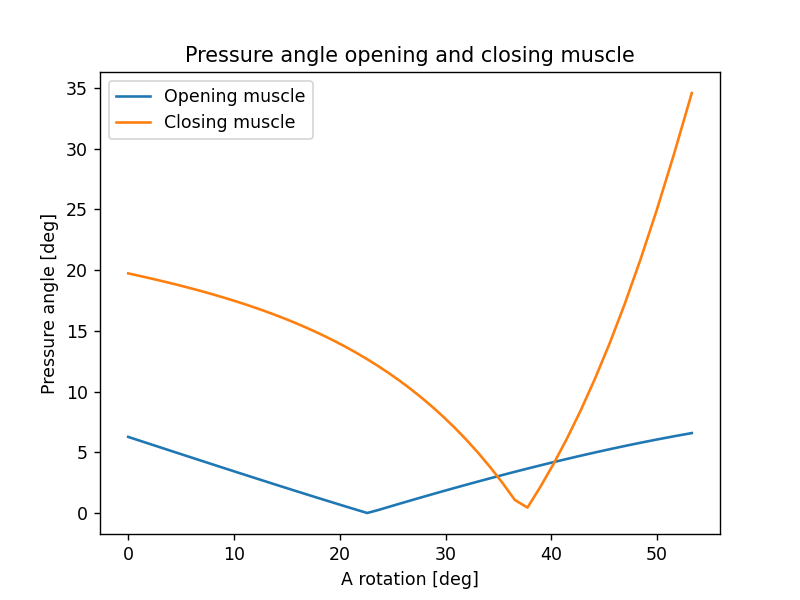

In [11]:
# Pressure angle muscles

theta_o_muscle2 = np.abs(o_muscle_ang2+3*np.pi/2-a1_ang2)

vel_P_c_muscle2 = np.cross(np.hstack((np.zeros((len(o_contr2), 1)), np.zeros((len(o_contr2), 1)), a_ang_dot2.reshape(-1, 1))), np.hstack((np.real( a2 * np.exp(1j * a_ang2)).reshape(-1, 1), np.imag(a2 * np.exp(1j * a_ang2)).reshape(-1, 1), np.zeros((len(o_contr2), 1))))) + np.cross(np.hstack((np.zeros((len(o_contr2), 1)), np.zeros((len(o_contr2), 1)), b_ang_dot2.reshape(-1, 1))), np.hstack((np.real( m2/4 * np.exp(1j * m_ang2)).reshape(-1, 1), np.imag(m2/4 * np.exp(1j * m_ang2)).reshape(-1, 1), np.zeros((len(o_contr2), 1)))))

theta_c_muscle2 = np.abs(c_muscle_ang2-np.arctan(vel_P_c_muscle2[:,1]/vel_P_c_muscle2[:,0]).reshape(-1))

plt.figure()
plt.plot(opening_ang2*conv,theta_o_muscle2*conv, label = 'Opening muscle')
plt.plot(opening_ang2*conv,theta_c_muscle2*conv, label = 'Closing muscle')
plt.title('Pressure angle opening and closing muscle')
plt.xlabel('A rotation [deg]')
plt.ylabel('Pressure angle [deg]')
plt.legend()

plt.show()

In [12]:
# Opening and closing velocities

o_vel_dim2 = opening_vel_norm2*o_muscle2[0]
c_vel_dim2 = closing_vel_norm2*c_muscle2[-1]

true_o_angular_vel2=70/45
true_c_angular_vel2=70/50

# Geometric velocity adimensional

opening_geometric_vel2 = -opening_vel2/a_ang_dot2
closing_geometric_vel2 = -opening_vel2/b_ang_dot2